<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

<center><h1 style="font-size:2em;color:#2467C0"> Datos del INEGI  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/inegi.png" align="middle" style="width:500"/></td>
<td>
    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.
    
</td>
</tr>
</table>

# API del Banco de Indicadores

La API de Indicadores del INEGI permite consultar los datos y metadatos de los indicadores disponibles a nivel nacional, por entidad federativa y municipio. Puede utilizar la API para crear aplicaciones que muestren la información directamente de las bases de datos del INEGI en el preciso momento en que se actualiza.
[[1]](https://www.inegi.org.mx/servicios/api_indicadores.html) 

<img src="figuras/Inegi_token.jpg" align="middle" style="width:1000px"/>


#  Historico de Población en México

<div class="alert alert-success">
1. Graficar el crecimiento de la población total, así como el de hombres y mujeres
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json                      

In [5]:
#Llamado al API
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
respuesta = requests.get(url)
respuesta.status_code

200

In [6]:
#url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/[TOKEN]?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    # print(respuesta.content)
    contenido = json.loads(respuesta.content)
    print(contenido)

{'Header': {'Name': 'Datos compactos BISE', 'Email': 'atencion.usuarios@inegi.org.mx'}, 'Series': [{'INDICADOR': '1002000001', 'FREQ': '7', 'TOPIC': '123', 'UNIT': '188', 'UNIT_MULT': '', 'NOTE': '1398', 'SOURCE': '2,3,343,487,781,1668,1669,1670,1671,1672,1677,1678,1679,1714,3001', 'LASTUPDATE': '21/10/2024 12:00:00 a. m.', 'STATUS': None, 'OBSERVATIONS': [{'TIME_PERIOD': '1910', 'OBS_VALUE': '15160369.00000000000000000000', 'OBS_EXCEPTION': None, 'OBS_STATUS': '3', 'OBS_SOURCE': '', 'OBS_NOTE': '', 'COBER_GEO': '0700'}, {'TIME_PERIOD': '1921', 'OBS_VALUE': '14334780.00000000000000000000', 'OBS_EXCEPTION': None, 'OBS_STATUS': '3', 'OBS_SOURCE': '', 'OBS_NOTE': '', 'COBER_GEO': '0700'}, {'TIME_PERIOD': '1930', 'OBS_VALUE': '16552722.00000000000000000000', 'OBS_EXCEPTION': None, 'OBS_STATUS': '3', 'OBS_SOURCE': '', 'OBS_NOTE': '', 'COBER_GEO': '0700'}, {'TIME_PERIOD': '1940', 'OBS_VALUE': '19653552.00000000000000000000', 'OBS_EXCEPTION': None, 'OBS_STATUS': '3', 'OBS_SOURCE': '', 'OBS_NO

In [29]:
contenido['Series'][0]['OBSERVATIONS'][0]

{'TIME_PERIOD': '1910',
 'OBS_VALUE': '15160369.00000000000000000000',
 'OBS_EXCEPTION': None,
 'OBS_STATUS': '3',
 'OBS_SOURCE': '',
 'OBS_NOTE': '',
 'COBER_GEO': '0700'}

In [35]:
poblacion_total = [int(element['OBS_VALUE'].split('.')[0]) for element in contenido['Series'][0]['OBSERVATIONS']]
periodos = [int(element['TIME_PERIOD']) for element in contenido['Series'][0]['OBSERVATIONS']]

In [36]:
poblacion_total

[15160369,
 14334780,
 16552722,
 19653552,
 25791017,
 34923129,
 48225238,
 66846833,
 81249645,
 91158290,
 97483412,
 103263388,
 112336538,
 119938473,
 126014024]

In [37]:
periodos

[1910,
 1921,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2020]

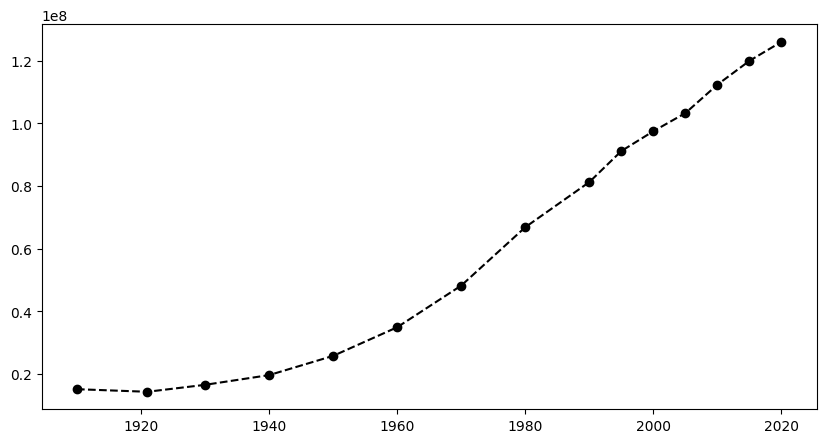

In [40]:
plt.figure(figsize=(10,5))
plt.plot(periodos, poblacion_total,'ko--')

In [41]:
url= 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/07000001/true/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
# url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    # print(respuesta.content)
    contenido = json.loads(respuesta.content)
    print(contenido)

{'Header': {'Name': 'Datos compactos BISE', 'Email': 'atencion.usuarios@inegi.org.mx'}, 'Series': [{'INDICADOR': '1002000001', 'FREQ': '7', 'TOPIC': '123', 'UNIT': '188', 'UNIT_MULT': '', 'NOTE': '1398', 'SOURCE': '2,3,343,487,781,1668,1669,1670,1671,1672,1677,1678,1679,1714,3001', 'LASTUPDATE': '21/10/2024 12:00:00 a. m.', 'STATUS': None, 'OBSERVATIONS': [{'TIME_PERIOD': '2020', 'OBS_VALUE': '1425607.00000000000000000000', 'OBS_EXCEPTION': None, 'OBS_STATUS': '3', 'OBS_SOURCE': '', 'OBS_NOTE': '', 'COBER_GEO': '07000001'}]}]}


In [45]:
poblacion_estados = []
for estado in range(7000001,7000033):
  url= f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0{estado}/true/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
  # url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
      # print(respuesta.content)
      contenido = json.loads(respuesta.content)
      poblacion_estados.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])

print(poblacion_estados)

# poblacion_estados = [int(float(poblacion)) for poblacion in poblacion_estados]


['1425607.00000000000000000000', '3769020.00000000000000000000', '798447.00000000000000000000', '928363.00000000000000000000', '3146771.00000000000000000000', '731391.00000000000000000000', '5543828.00000000000000000000', '3741869.00000000000000000000', '9209944.00000000000000000000', '1832650.00000000000000000000', '6166934.00000000000000000000', '3540685.00000000000000000000', '3082841.00000000000000000000', '8348151.00000000000000000000', '16992418.00000000000000000000', '4748846.00000000000000000000', '1971520.00000000000000000000', '1235456.00000000000000000000', '5784442.00000000000000000000', '4132148.00000000000000000000', '6583278.00000000000000000000', '2368467.00000000000000000000', '1857985.00000000000000000000', '2822255.00000000000000000000', '3026943.00000000000000000000', '2944840.00000000000000000000', '2402598.00000000000000000000', '3527735.00000000000000000000', '1342977.00000000000000000000', '8062579.00000000000000000000', '2320898.00000000000000000000', '1622138.

In [46]:
poblacion_estados = [int(float(poblacion)) for poblacion in poblacion_estados]
poblacion_estados

[1425607,
 3769020,
 798447,
 928363,
 3146771,
 731391,
 5543828,
 3741869,
 9209944,
 1832650,
 6166934,
 3540685,
 3082841,
 8348151,
 16992418,
 4748846,
 1971520,
 1235456,
 5784442,
 4132148,
 6583278,
 2368467,
 1857985,
 2822255,
 3026943,
 2944840,
 2402598,
 3527735,
 1342977,
 8062579,
 2320898,
 1622138]

<div class="alert alert-success">
2. Mostrar en un mapa  el porcentaje de población de 12 años y más económicamente activa por estados. 
Utilizar alguna gama de color que a continuación se presenta.

</div>

<img align="left" style="padding-right:10px;" src="figuras/colores.png">
